# Position residuals w.r.t. magnitude

In [2]:
%matplotlib notebook

import astropy.io.ascii
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [3]:
deg_to_arcsec = 60. * 60.

## data

Read in the chi2 contributions files output by jointcal and extract the unique visits.

In [4]:
initial = astropy.io.ascii.read('../tests/astrometry_initial_chi2-0_r-meas.csv')
final = astropy.io.ascii.read('../tests/astrometry_final_chi2-0_r-meas.csv')
# Uncomment the below to use the validation_data_hsc output (4 visits)
# initial = astropy.io.ascii.read('/data/validate/jointcal-hsc/astrometry_initial_chi2-0_i-meas.csv')
# final = astropy.io.ascii.read('/data/validate/jointcal-hsc/astrometry_final_chi2-0_i-meas.csv')

visits = np.unique(final['visit'])

### Some simple preliminary plots

<IPython.core.display.Javascript object>


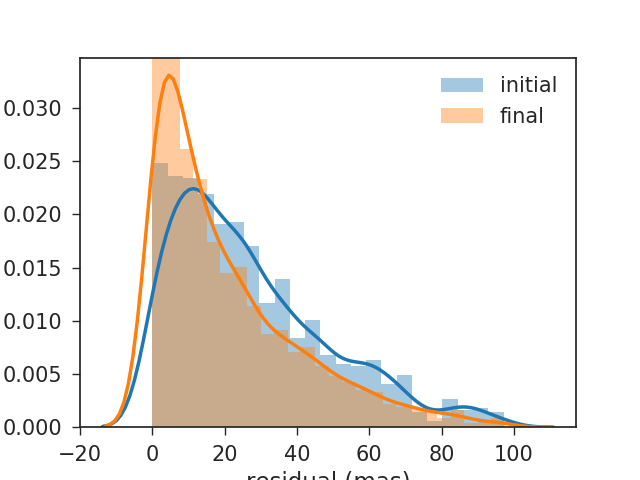

In [5]:
initial_residuals = np.sqrt(initial['rxi']**2 + initial['ryi']**2)*deg_to_arcsec*1e3
final_residuals = np.sqrt(final['rx']**2 + final['ry']**2)*deg_to_arcsec*1e3
plt.figure()
sns.distplot(initial_residuals[initial_residuals < 100], label='initial')
sns.distplot(final_residuals[final_residuals < 100], label='final')
plt.xlabel('residual (mas)')
plt.ylabel('normalized number')
plt.legend()

## functions

In [6]:
def plot_mags(data):
    """Magnitudes vs. x/y residuals"""
    deg_to_mas = 3.6e6

    for visit in visits:
        cut = data[(data['visit'] == visit)]
        print("%d total, cut: %d, %d"%(visit, len(data), len(cut)))
        fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
        fig.subplots_adjust(wspace=0)
        axes[0].hexbin(cut['mag'], deg_to_mas*cut['rx'], mincnt=1)
    #     ax = sns.kdeplot(data['mag'], deg_to_mas*data['rx'], ax=axes[0], shade=True, cut=0, gridsize=50, shade_lowest=False)
        axes[0].set_ylabel("x residual (mas)")
    #     ax = sns.kdeplot(data['mag'], deg_to_mas*data['ry'], ax=axes[1], shade=True, cut=0, gridsize=50, shade_lowest=False)
        axes[1].hexbin(cut['mag'], deg_to_mas*cut['ry'], mincnt=1)
        axes[1].yaxis.set_label_position("right")
        axes[1].set_ylabel("y residual (mas)")
        fig.suptitle('visit: %d'%visit)

In [7]:
def plot_tangentplane_residuals(initial, final):
    """Quiver plots of on-sky residuals, input WCS vs. final jointcal fit."""
    label_length = 10
    fact = 4e3

    for visit in visits:
        cut1 = initial[(initial['nm'] > 1) & (initial['visit'] == visit)]
        cut2 = final[(final['nm'] > 1) & (final['visit'] == visit)]
        fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)
        fig.subplots_adjust(wspace=0)
        Q1 = axes[0].quiver(cut1['ra'], cut1['dec'], cut1['rxi'], cut1['ryi'],
                            scale = 1/deg_to_arcsec, units='width', headwidth=4)
        Q2 = axes[1].quiver(cut2['ra'], cut2['dec'], cut2['rx'], cut2['ry'],
                            scale = 1/deg_to_arcsec, units='width', headwidth=4)
        axes[0].quiverkey(Q1, 0.80, 0.92, label_length/deg_to_arcsec/100, '%d mas' %
                         label_length, labelpos='E', coordinates='figure')
        axes[1].quiverkey(Q2, 0.10, 0.92, label_length/deg_to_arcsec/100, '%d mas' %
                         label_length, labelpos='E', coordinates='figure')
        axes[0].set_title('intial')
        axes[1].set_title('final')
        axes[0].set_xlabel("x tangent plane (degrees)")
        axes[1].set_xlabel("x tangent plane (degrees)")
        axes[0].set_ylabel("y tangent plane (degrees)")
        fig.suptitle('visit: %d'%visit)

In [12]:
def plot_tangentplane_residual_magnitudes(initial, final):
    """Magnitude of on-sky residuals, input WCS vs. final jointcal fit."""
    deg_to_arcsec = 60. * 60.
    label_length = 10
    vmax = 0.1 / deg_to_arcsec

    for visit in visits:
        cut1 = initial[(initial['nm'] > 1) & (initial['visit'] == visit)]
#         cut1 = final[(final['nm'] > 1) & (final['visit'] == visit)]
        cut2 = final[(final['nm'] > 1) & (final['visit'] == visit)]
        fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)
        fig.subplots_adjust(wspace=0)
        axes[0].hexbin(cut1['ra'], cut1['dec'], np.sqrt(cut1['rxi']**2 + cut1['ryi']**2), vmin=0, vmax=vmax)
        axes[1].hexbin(cut2['ra'], cut2['dec'], np.sqrt(cut2['rx']**2 + cut2['ry']**2), vmin=0, vmax=vmax)
        axes[0].set_title('intial')
        axes[1].set_title('final')
        axes[0].set_xlabel("x tangent plane (degrees)")
        axes[1].set_xlabel("x tangent plane (degrees)")
        axes[0].set_ylabel("y tangent plane (degrees)")
        fig.suptitle('visit: %d'%visit)

## Plots

<IPython.core.display.Javascript object>


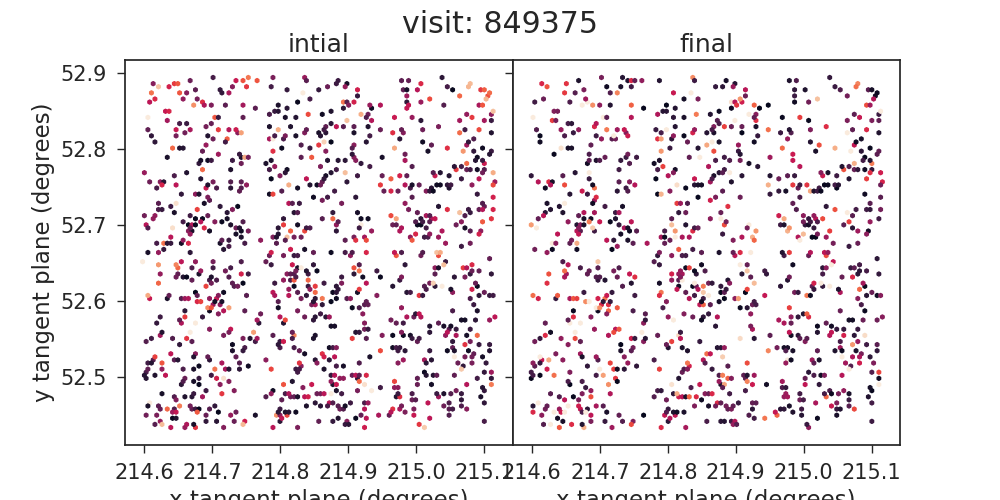

<IPython.core.display.Javascript object>


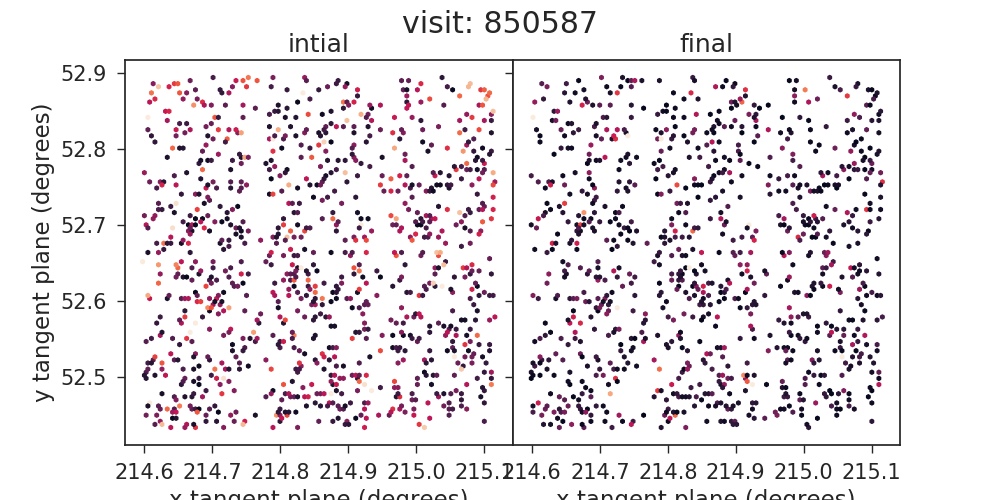

In [13]:
plot_tangentplane_residual_magnitudes(initial, final)

<IPython.core.display.Javascript object>


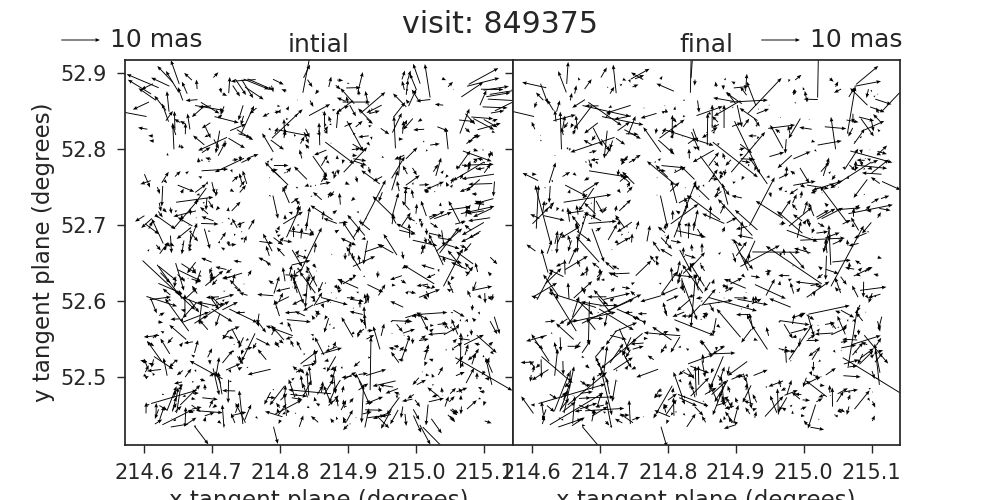

<IPython.core.display.Javascript object>


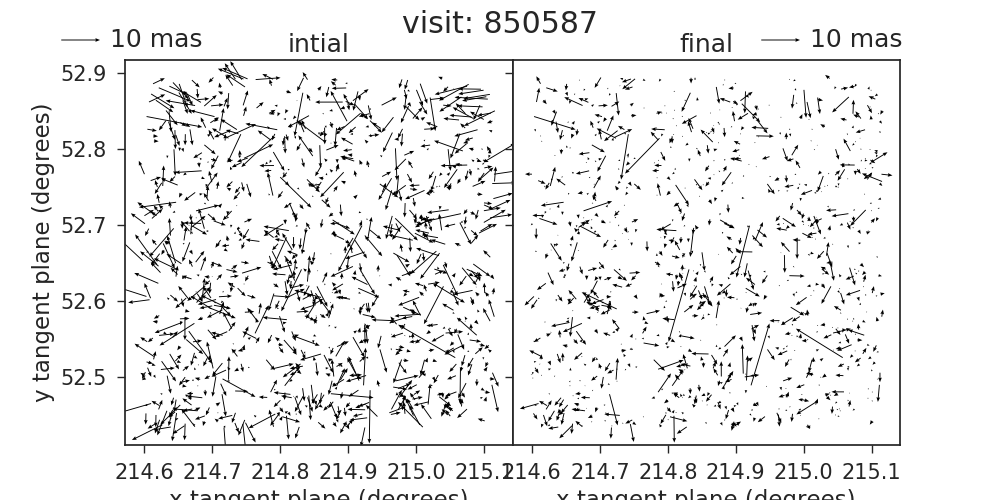

In [10]:
plot_tangentplane_residuals(initial, final)

<IPython.core.display.Javascript object>


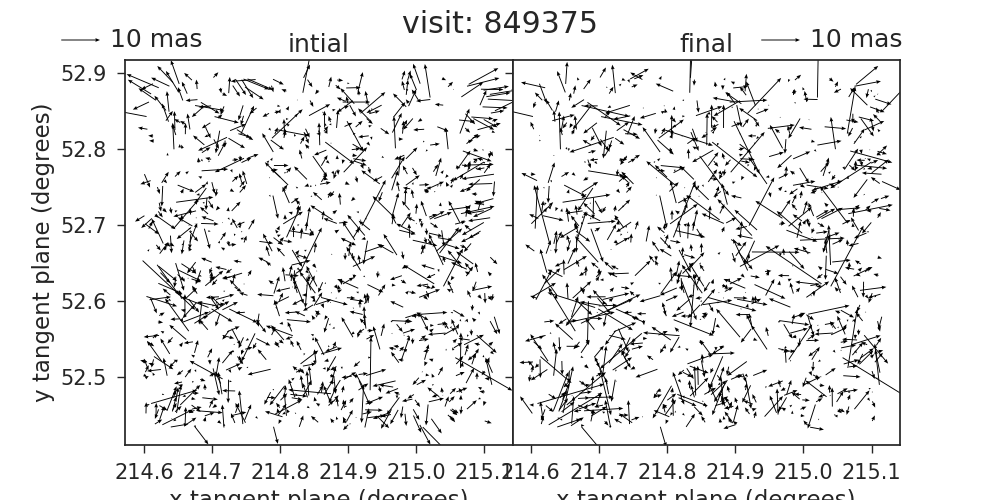

<IPython.core.display.Javascript object>


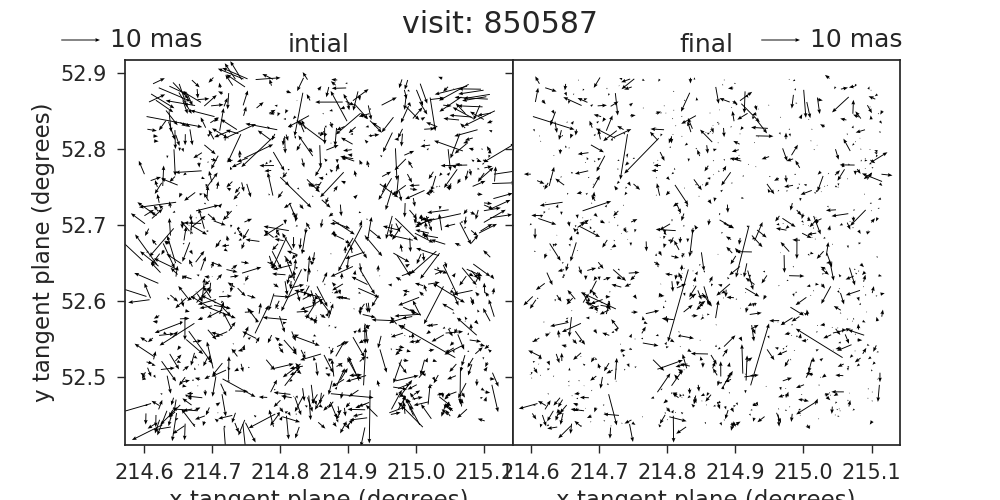

In [115]:
plot_tangentplane_residuals(initial, final)

## Initial residuals

903982 total, cut: 119263, 33270


<IPython.core.display.Javascript object>


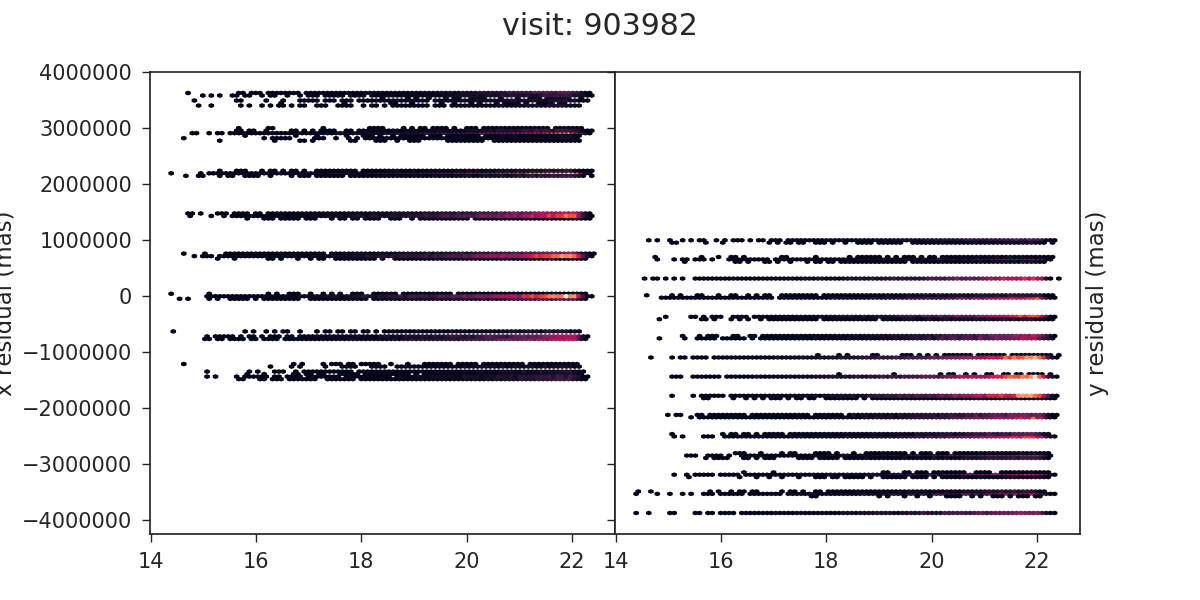

904006 total, cut: 119263, 29741


<IPython.core.display.Javascript object>


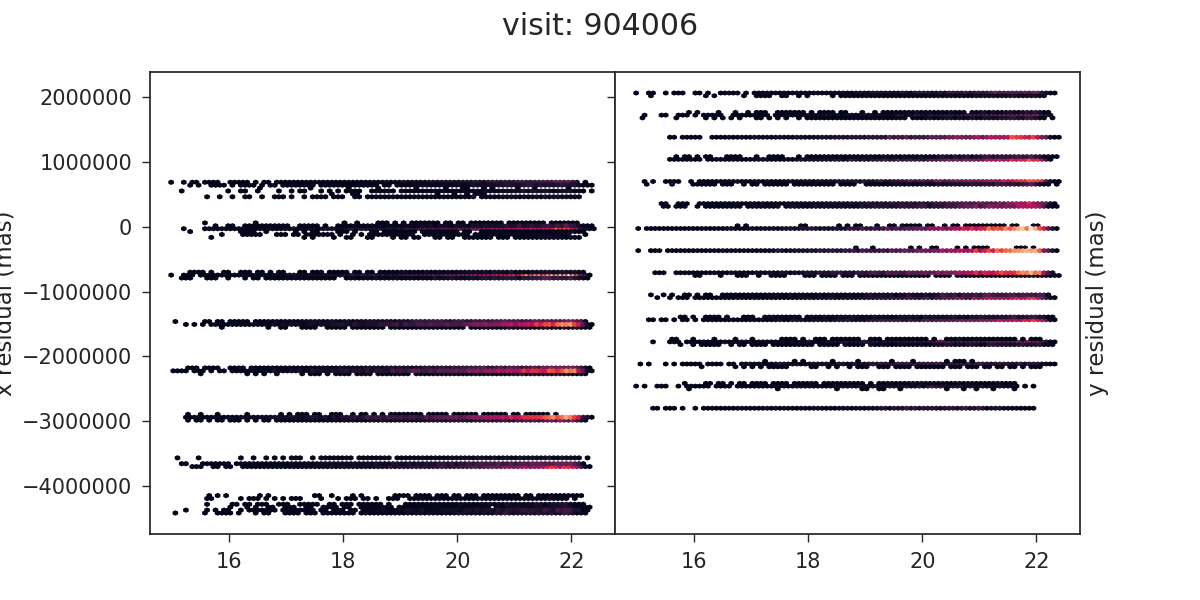

904828 total, cut: 119263, 31673


<IPython.core.display.Javascript object>


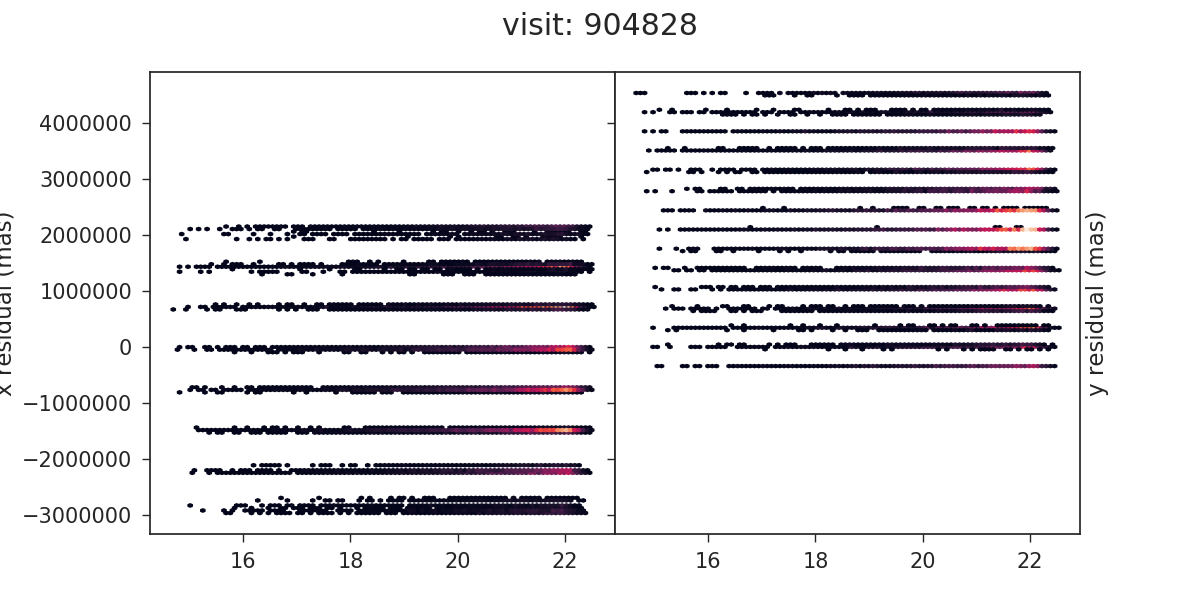

904846 total, cut: 119263, 24579


<IPython.core.display.Javascript object>


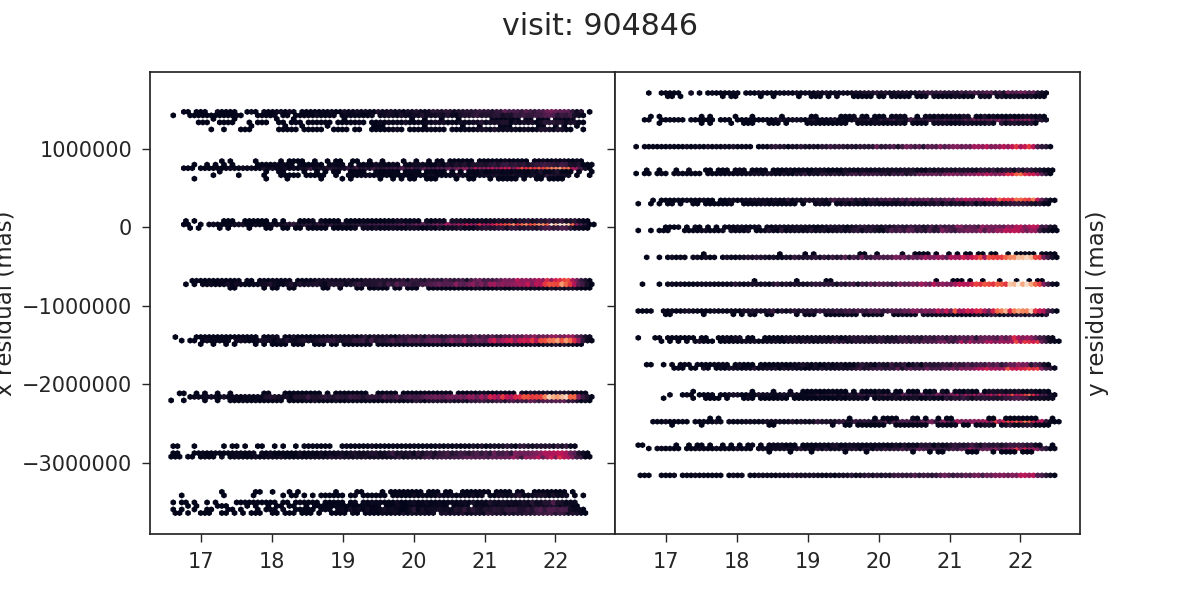

In [134]:
plot_mags(initial)

## Final residuals

849375 total, cut: 2287, 1121
850587 total, cut: 2287, 1166


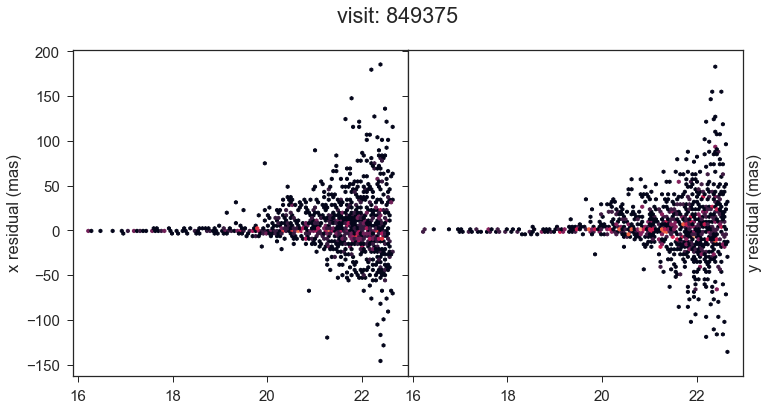

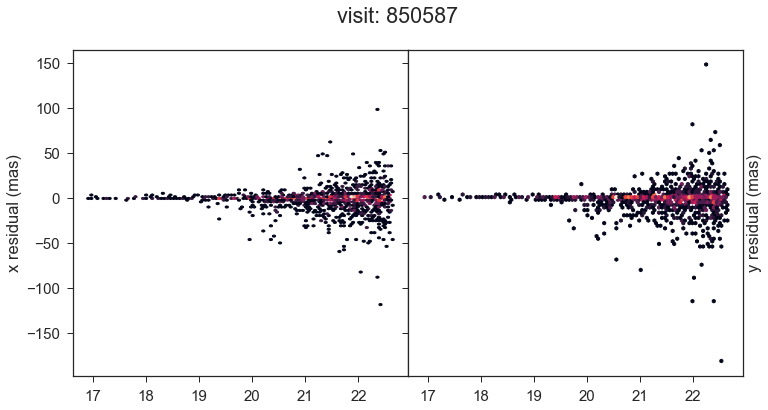

In [72]:
plot_mags(final)